In [7]:
pip install pyspark

## Warm-Up!

In [8]:
import pyspark
from pyspark.sql import SparkSession as sess
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [ ]:
spark = sess.builder.appName('Dataframe').getOrCreate()
spark

### Q1:

In [ ]:
spark.read.option('header', 'true').csv('/content/drive/MyDrive/stocks.csv').show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

### Q2:

In [ ]:
df = spark.read.option('header', 'true').csv('/content/drive/MyDrive/stocks.csv', inferSchema = True)
print("Rows num:", df.count(), "Columns num:", len(df.columns))
df.printSchema()

Rows num: 1762 Columns num: 7
root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
df.dropDuplicates()
print("Rows num:", df.count(), "Columns num:", len(df.columns))

Rows num: 1762 Columns num: 7


### Q3:

In [ ]:
filtered_spx = df.filter(df['Close'] < 500)

selected_columns = ['Open', 'Close', 'Volume']
filtered_spx = filtered_spx.select(*selected_columns)
filtered_spx.show()

+------------------+------------------+---------+
|              Open|             Close|   Volume|
+------------------+------------------+---------+
|        213.429998|        214.009998|123432400|
|        214.599998|        214.379993|150476200|
|        214.379993|        210.969995|138040000|
|            211.75|            210.58|119282800|
|        210.299994|211.98000499999998|111902700|
|212.79999700000002|210.11000299999998|115557400|
|209.18999499999998|        207.720001|148614900|
|        207.870005|        210.650002|151473000|
|210.11000299999998|            209.43|108223500|
|210.92999500000002|            205.93|148516900|
|        208.330002|        215.039995|182501900|
|        214.910006|            211.73|153038200|
|        212.079994|        208.069996|152038600|
|206.78000600000001|            197.75|220441900|
|202.51000200000001|        203.070002|266424900|
|205.95000100000001|        205.940001|466777500|
|        206.849995|        207.880005|430642100|


### Q4:

In [ ]:
filtered_spx2 = df.filter((df['Open'] > 200) & (df['Close'] < 200))
filtered_spx2.show()

+----------+------------------+----------+----------+----------+---------+------------------+
|      Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+----------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+----------+------------------+----------+----------+----------+---------+------------------+



### Q5:

In [ ]:
from pyspark.sql.functions import year, col

df_with_year = df.withColumn('Year', year(col('Date')))
df_with_year.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+----+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|
|2010-01-11|212.

### Q6:

In [ ]:
from pyspark.sql.functions import min

min_volumes_by_year = df_with_year.groupBy("year").agg(min("volume").alias("minVolume"))
min_volumes_by_year.show()

+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



### Q7:

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, max

max_low_by_year_month = df.groupBy(year("Date").alias("year"), month("Date").alias("month")).agg(max("Low").alias("maxLow"))
max_low_by_year_month.show()

+----+-----+------------------+
|year|month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
|2012|    4| 626.0000150000001|
|2012|   12|        585.500023|
|2014|   10|        107.209999|
|2016|    5|             99.25|
|2014|   12|        115.290001|
|2013|    9|        503.479988|
|2013|   10|        525.110016|
|2014|    5|        628.900002|
|2016|    2|         96.650002|
|2013|   12| 566.4100269999999|
+----+-----+------------------+
only showing top 20 rows



### Q8:

In [ ]:
from pyspark.sql.functions import mean, stddev

result = df.agg(mean("High").alias("mean_high_price"), stddev("High").alias("stddev_high_price"))
result.show(truncate=False)

+-----------------+------------------+
|mean_high_price  |stddev_high_price |
+-----------------+------------------+
|315.9112880164581|186.89817686485767|
+-----------------+------------------+



## Main Task:

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SpotifyAnalysis").getOrCreate()
df = spark.read.parquet("/content/drive/MyDrive/spotify.parquet")
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



In [10]:
print("Rows num:", df.count(), "Columns num:", len(df.columns))
df.dropDuplicates()
print("Rows num:", df.count(), "Columns num:", len(df.columns))

Rows num: 1204025 Columns num: 24
Rows num: 1204025 Columns num: 24


In [11]:
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+--------

In [12]:
from pyspark.sql.functions import month, dayofmonth

df_with_month_day = df.withColumn("month", month(df["release_date"])).withColumn("day", dayofmonth(df["release_date"]))
df_with_month_day.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+-----+---+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|month|day|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------

In [23]:
import matplotlib.pyplot as plt
selected_df = df_with_month_day.select("year", "duration_ms")

selected_df = selected_df.withColumn("duration_seconds", selected_df["duration_ms"] / 1000)
filtered_df = selected_df.filter(selected_df["year"] >= 1700)

In [15]:
avg_duration_df = filtered_df.groupBy("year").agg({"duration_seconds": "avg"})
avg_duration_df.show()

+----+---------------------+
|year|avg(duration_seconds)|
+----+---------------------+
|1950|   228.28993167701861|
|1936|    164.6073012048193|
|1951|    193.5646571428572|
|1958|    207.7744397463002|
|1983|    247.3319686393527|
|1972|    263.9221145510839|
|2007|   247.87997692184592|
|1979|   253.36725498575498|
|1988|   262.58333861386166|
|2014|    259.2825934007341|
|1986|    259.6227110377704|
|1908|   226.20347368421054|
|1949|   186.79237931034476|
|1969|   230.62910104250219|
|1930|   209.90483050847462|
|1967|   220.11469432314448|
|1964|   258.59741015089185|
|1956|    239.3593208661417|
|1937|    159.1927000000001|
|2012|   256.85916300877807|
+----+---------------------+
only showing top 20 rows



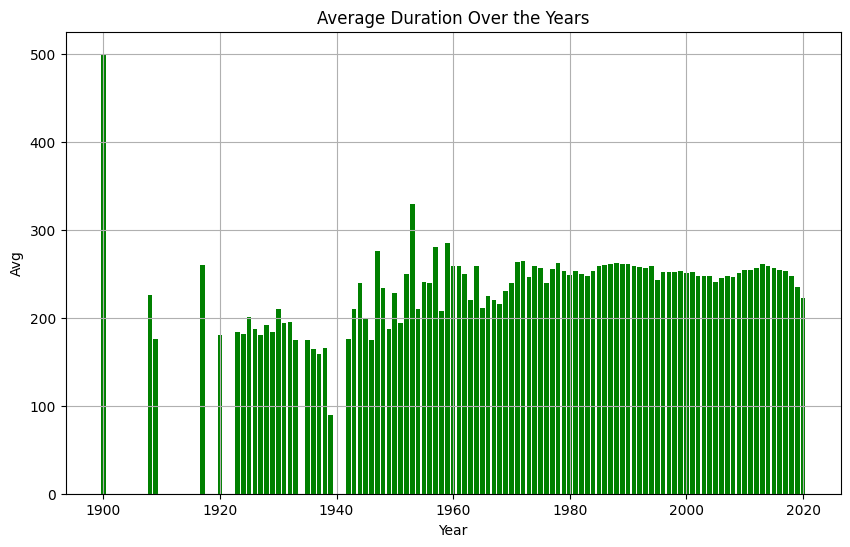

In [16]:
import matplotlib.pyplot as plt

year = avg_duration_df.select("year").collect()
avg = avg_duration_df.select("avg(duration_seconds)").collect()

years = [row["year"] for row in year]
avgs = [row["avg(duration_seconds)"] for row in avg]

plt.figure(figsize=(10, 6))
plt.bar(years, avgs, color="green")
plt.xlabel("Year")
plt.ylabel("Avg")
plt.title("Average Duration Over the Years")
plt.grid(True)
plt.show()

In [67]:
avg_danceability_df = df_with_month_day.filter(df_with_month_day["year"] >= 1700)
avg_danceability_df = avg_danceability_df.groupBy("year").agg({"danceability": "avg"})
avg_danceability_df.show()

+----+-------------------+
|year|  avg(danceability)|
+----+-------------------+
|1950|0.36131490683229806|
|1936| 0.6403253012048196|
|1951| 0.5096514285714284|
|1958|0.42693763213530633|
|1983| 0.5261137076378359|
|1972|0.47114484004127966|
|2007| 0.4932024286247292|
|1979| 0.5133617283950606|
|1988| 0.4408339713971399|
|2014| 0.4864852460837718|
|1986|0.47716674000733234|
|1908| 0.6041052631578946|
|1949| 0.4038226600985222|
|1969| 0.4574455493183644|
|1930| 0.5812372881355932|
|1967|0.47026681222707495|
|1964|0.39532373113854574|
|1956|0.45642519685039323|
|1937| 0.6565749999999999|
|2012|0.48052502881972387|
+----+-------------------+
only showing top 20 rows



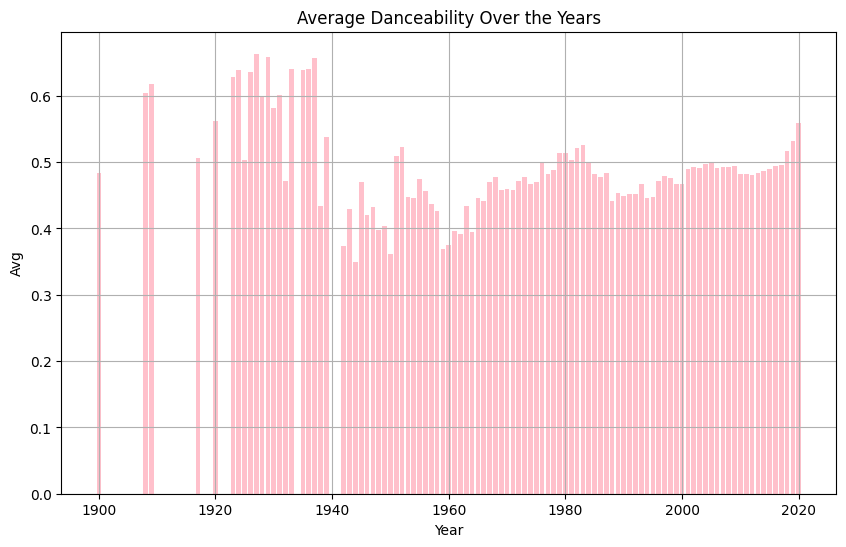

In [72]:
import matplotlib.pyplot as plt

year = avg_danceability_df.select("year").collect()
avg = avg_danceability_df.select("avg(danceability)").collect()

years = [row["year"] for row in year]
avgs = [row["avg(danceability)"] for row in avg]

plt.figure(figsize=(10, 6))
plt.bar(years, avgs, color="pink")
plt.xlabel("Year")
plt.ylabel("Avg")
plt.title("Average Danceability Over the Years")
plt.grid(True)
plt.show()

* Danceability of of song increased in recent yeras and this issue can indicate that listeners' desire for this type of songs has increased, so songs with high danceability and their trending are important for the company.

In [17]:
longest_song = filtered_df.orderBy("duration_seconds", ascending=False).first()
shortest_song = filtered_df.orderBy("duration_seconds").first()

print(f"Longest Song (Year {longest_song['year']}): {longest_song['duration_seconds']} seconds")
print(f"Shortest Song (Year {shortest_song['year']}): {shortest_song['duration_seconds']} seconds")


Longest Song (Year 2018): 6061.09 seconds
Shortest Song (Year 2005): 1.0 seconds


In [24]:
songs_per_year_df = filtered_df.groupBy("year").count()
songs_per_year_df.show()

+----+-----+
|year|count|
+----+-----+
|1950|  161|
|1936|   83|
|1951|  175|
|1958|  473|
|1983| 1977|
|1972| 1938|
|2007|56287|
|1979| 2106|
|1988| 4545|
|2014|45005|
|1986| 2727|
|1908|   19|
|1949|  203|
|1969| 1247|
|1930|   59|
|1967|  916|
|1964|  729|
|1956|  508|
|1937|   40|
|2012|45108|
+----+-----+
only showing top 20 rows



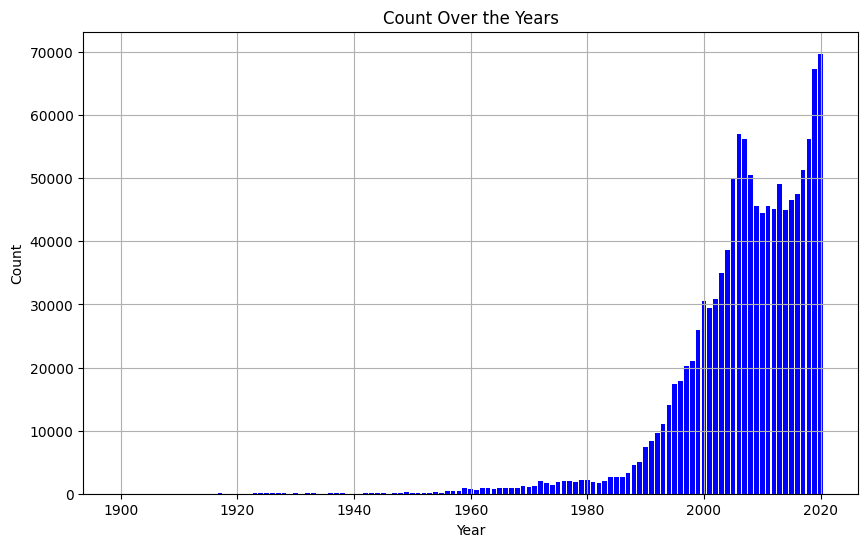

In [71]:
import matplotlib.pyplot as plt

year = songs_per_year_df.select("year").collect()
count = songs_per_year_df.select("count").collect()

years = [row["year"] for row in year]
counts = [row["count"] for row in count]

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color="blue")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count Over the Years")
plt.grid(True)
plt.show()

* As you can see, the number of songs releazed in a year is on the rise, and the company must develop its infrastructure, including servers, human resources, etc., in order to provide optimal services.

In [44]:
filtered_df = df_with_month_day.filter(df_with_month_day["year"] >= 2015)
songs_per_month_after_2015_df = filtered_df.groupBy("month").count()
songs_per_month_after_2015_df.show()

+-----+-----+
|month|count|
+-----+-----+
|   12|18871|
|    1|23281|
|    6|27295|
|    3|28873|
|    5|28903|
|    9|32505|
|    4|28952|
|    8|28088|
|    7|25305|
|   10|37762|
|   11|33627|
|    2|25000|
+-----+-----+



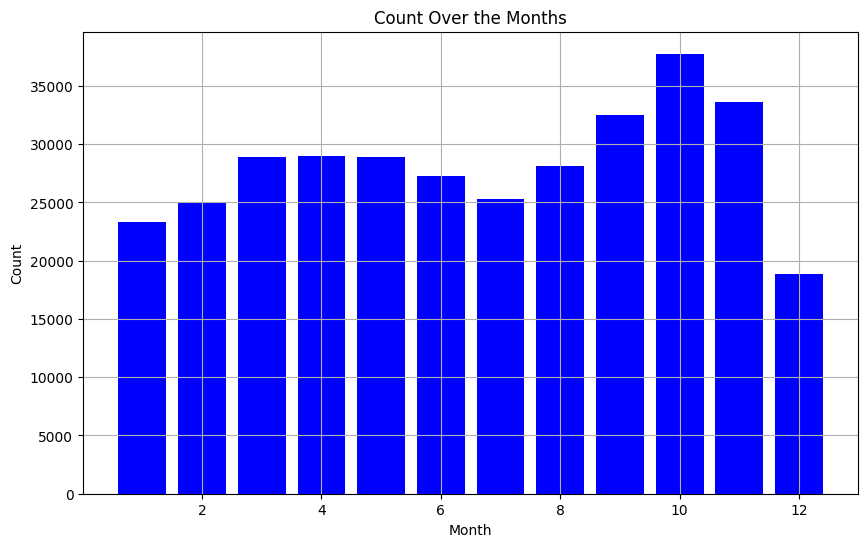

In [63]:
import matplotlib.pyplot as plt

month = songs_per_month_after_2015_df.select("month").collect()
count = songs_per_month_after_2015_df.select("count").collect()

months = [row["month"] for row in month]
counts = [row["count"] for row in count]

plt.figure(figsize=(10, 6))
plt.bar(monthes, counts, color="blue")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count Over the Months")
plt.grid(True)
plt.show()

* In this section, the songs released after 2015 were examined, and the goal is to find the month with the highest number of songs released in it. As you can see, most of songs were released in August, September and October, and it is better to support the site more carefully in these months.

In [61]:
filtered_df = df_with_month_day.filter(df_with_month_day["year"] >= 2015)
songs_per_day_after_2015_df = filtered_df.groupBy("day").count()
songs_per_day_after_2015_df.show()

+---+-----+
|day|count|
+---+-----+
| 31| 8065|
| 28|10592|
| 27|11752|
| 26|10152|
| 12| 9203|
| 22|10373|
|  1|20883|
| 13|12780|
|  6|11546|
| 16|10579|
|  3|11106|
| 20|12095|
|  5| 9491|
| 19| 9590|
| 15|12600|
| 17|11108|
|  9|10344|
|  4|10485|
|  8|10329|
| 23|10685|
+---+-----+
only showing top 20 rows



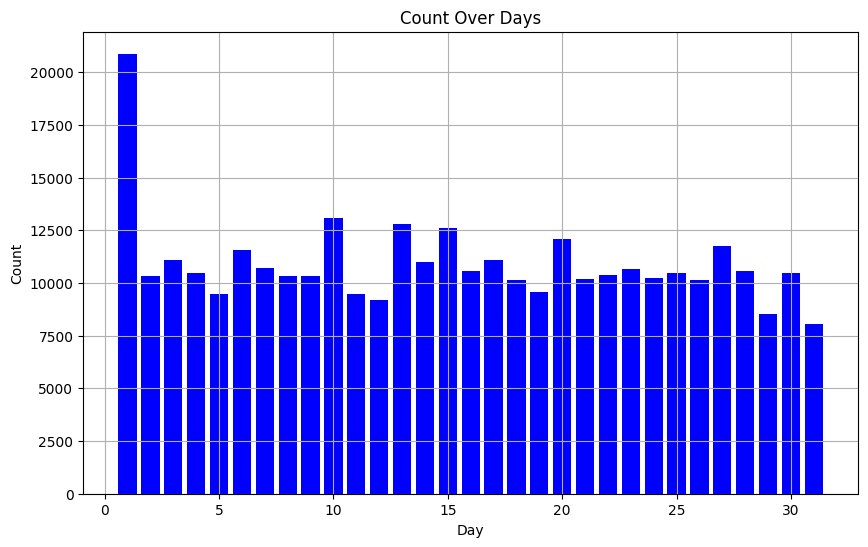

In [62]:
import matplotlib.pyplot as plt

day = songs_per_day_after_2015_df.select("day").collect()
count = songs_per_day_after_2015_df.select("count").collect()

days = [row["day"] for row in day]
counts = [row["count"] for row in count]

plt.figure(figsize=(10, 6))
plt.bar(days, counts, color="blue")
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Count Over Days")
plt.grid(True)
plt.show()

* In this section, the songs released after 2015 were examined, and the goal is to find the day of the month with the highest number of songs released in it. As you can see, most of songs were released in the first day of the month, and it is better to support the site more carefully in these months.

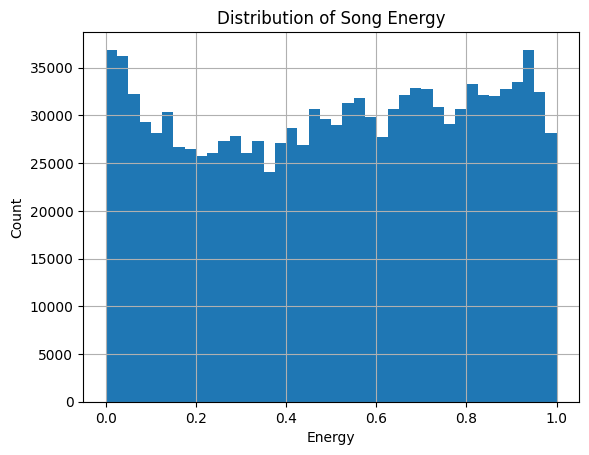

In [20]:
#Distribution of Song Energy:

energy =[row["energy"] for row in df_with_month_day.select("energy").collect()]
plt.hist(energy, bins = 40)
plt.xlabel("Energy")
plt.ylabel("Count")
plt.title("Distribution of Song Energy")
plt.grid(True)
plt.show()


In [ ]:
#Correlation between Energy and Valence:
correlation_df = df_with_month_day.stat.corr("energy", "valence")

print(f"Correlation between energy and valence: {correlation_df:.4f}")


Correlation between energy and valence: 0.3995


In [ ]:
filtered_df.show()

+----+-----------+----------------+
|year|duration_ms|duration_seconds|
+----+-----------+----------------+
|1999|     210133|         210.133|
|1999|     206200|           206.2|
|1999|     298893|         298.893|
|1999|     213640|          213.64|
|1999|     205600|           205.6|
|1999|     280960|          280.96|
|1999|     202040|          202.04|
|1999|     228093|         228.093|
|1999|     151573|         151.573|
|1999|     224933|         224.933|
|1999|     277267|         277.267|
|1999|     216427|         216.427|
|1992|     243760|          243.76|
|1992|     313667|         313.667|
|1992|     335840|          335.84|
|1992|     287333|         287.333|
|1992|     307067|         307.067|
|1992|     294693|         294.693|
|1992|     364133|         364.133|
|1992|     331107|         331.107|
+----+-----------+----------------+
only showing top 20 rows



# Questions:

**1) Lazy evaluation is a programming concept where the evaluation of expressions is delayed until their results are actually needed. In the context of Apache Spark, transformations such as filter, map, and groupBy are lazily evaluated. This means that when you call a transformation on a DataFrame or RDD, Spark does not immediately execute it. The primary reason for using lazy evaluation is to optimize resource usage. example:**

In [ ]:
import pyspark

from pyspark.sql import SparkSession as sess
spark = sess.builder.appName('Dataframe2').getOrCreate()
# Sample data
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]

# Define a simple schema
schema = ["Name", "Age"]

# Create a DataFrame with the sample data
df = spark.createDataFrame(data, schema=schema)

# Apply a transformation (filter)
filtered_df = df.filter(df["Age"] > 30)

# No actual filtering happens yet!

# Now let's trigger an action (show the dataframe)
filtered_df.show()

**2) Parquet is designed for columnar storage. Unlike CSV, which stores data in rows, Parquet organizes data by columns. Each column is stored separately, allowing for efficient compression and retrieval of specific columns.  Due to its columnar structure, Parquet achieves better storage efficiency. It compresses similar data values together, resulting in smaller file sizes. This is crucial for managing large datasets. Parquet’s columnar layout enhances query performance. When executing analytical queries, Parquet only reads the relevant columns, minimizing I/O and speeding up data retrieval.**

**3) Assign Checkpointed Dataframe to a Variable:**

In [ ]:
df = df.checkpoint()

**Set the Checkpoint Directory:**

In [ ]:
spark.sparkContext.setCheckpointDir('/path/to/checkpoint/dir')

**4)**

1. **Columnar Storage Formats**:
   - Consider using **columnar storage formats** like **Parquet** or **ORC (Optimized Row Columnar)**. These formats store data in a column-wise manner, allowing efficient compression and retrieval of specific columns. Unlike traditional row-based formats (e.g., CSV), columnar formats minimize I/O by reading only the necessary columns during filtering.
   - **Advantages**:
     - Reduced storage space due to efficient compression.
     - Faster query performance by reading only relevant columns.
     - Schema evolution support.
   - **Disadvantages**:
     - Slightly higher write overhead during data ingestion.

2. **Partitioning**:
   - **Partitioning** involves dividing data into smaller chunks based on specific columns (e.g., date, category). Each partition becomes a separate directory or file. For example, partitioning data by date allows faster filtering based on date ranges.
   - **Advantages**:
     - Efficient pruning during queries (only relevant partitions are scanned).
     - Parallelism during data loading and querying.
   - **Disadvantages**:
     - Increased storage overhead due to additional directories/files.

3. **Indexing**:
   - Create **indexes** on columns frequently used for filtering (e.g., date, category). Indexes allow faster lookup and reduce the need for full scans.
   - **Advantages**:
     - Sublinear time complexity for lookups.
     - Improved query performance.
   - **Disadvantages**:
     - Additional storage for index structures.
4. **Caching**:
   - Implement **caching** mechanisms to store intermediate query results. When a query is repeated, retrieve the result from the cache instead of recomputing it.
   - **Advantages**:
     - Reduced computation overhead.
     - Faster response times for common queries.
   - **Disadvantages**:
     - Cache eviction policies need careful consideration.




**5)**

1. **Pandas**:
   - **Use Case**:
     - **Smaller Datasets**: Pandas is ideal for working with **smaller tabular datasets** that fit comfortably in memory. It's widely used for data exploration, cleaning, and basic analysis.
   - **Advantages**:
     - **Mature Ecosystem**: Pandas has a mature ecosystem with numerous libraries and tools built around it for data analysis, visualization, and machine learning.
     - **Ease of Use**: Pandas provides an intuitive interface for data manipulation and transformation.
     - **Human-Readable Output**: Dataframes in Pandas are easy to inspect and understand.
   - **Limitations**:
     - **Single Machine**: Pandas operates on a **single machine**, which can be limiting for large datasets.
     - **Resource Constraints**: As data grows, you might encounter memory and performance issues.
     - **Not Distributed**: Pandas doesn't support distributed processing out of the box.

2. **PySpark**:
   - **Use Case**:
     - **Large Datasets**: PySpark shines when dealing with **large-scale datasets** that require distributed computing. It's designed for big data processing.
   - **Advantages**:
     - **Distributed Processing**: PySpark runs on **multiple machines**, leveraging the power of distributed clusters. It can process operations much faster (often 100x) than Pandas.
     - **Integration with Spark Ecosystem**: PySpark integrates seamlessly with other big data tools within the Apache ecosystem (e.g., Spark SQL, MLlib, Spark Streaming).
     - **Scalability**: PySpark scales horizontally, making it suitable for massive datasets.
   - **Limitations**:
     - **Learning Curve**: PySpark has a steeper learning curve due to its distributed nature and Spark-specific concepts.
     - **Complexity**: Setting up and managing Spark clusters can be more complex.
     - **Less Human-Readable Output**: Spark's output isn't as human-friendly as Pandas dataframes.

3. **When to Choose Each**:
   - **Pandas**:
     - Choose Pandas for **quick exploratory analysis**, small-scale data manipulation, and when you're comfortable with Python.
     - Use it for **prototyping models** before scaling up to PySpark.
   - **PySpark**:
     - Opt for PySpark when dealing with **big data**, especially when your dataset exceeds memory limits.
     - Use it for **machine learning pipelines**, **ETL processes**, and **real-time analytics**.
     - Consider PySpark when you need to process data across a **distributed cluster**.

In summary, if you're working with smaller datasets and need simplicity, Pandas is your go-to. For large-scale data processing, distributed computing, and scalability, PySpark is the powerhouse you need!.

